In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib.pyplot as plt

import seaborn as sns
import plotly.express as px
import ipywidgets as widgets
from IPython.display import display


from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

from sklearn.cluster import DBSCAN

In [3]:
plt.rcParams['figure.figsize'] = [6,4]
plt.rcParams['figure.dpi'] = 200
plt.rcParams["axes.grid"] = False

In [4]:
%store -r England_2019

In [5]:
England_2019

,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
12,12,MM Ali (ENG),14,11,3,145,46*,18.12,148,97.97,...,588,6,3/50,98.00,6.39,92.0,0,0,6,0
22,22,JC Archer (ENG),14,7,3,13,7*,3.25,22,59.09,...,569,23,3/27,24.73,4.63,32.0,0,0,4,0
30,30,JM Bairstow (ENG),20,18,0,844,128,46.88,820,102.92,...,-,-,-,-,-,-,-,-,11,0
49,49,JC Buttler (ENG),20,16,2,667,150,47.64,492,135.56,...,-,-,-,-,-,-,-,-,18,6
69,69,TK Curran (ENG),6,5,2,107,47*,35.66,104,102.88,...,290,9,4/75,32.22,6.54,29.5,1,0,0,0
77,77,JL Denly (ENG),4,2,0,25,17,12.50,38,65.78,...,60,1,1/24,60.00,5.45,66.0,0,0,2,0
104,104,BT Foakes (ENG),1,1,1,61,61*,-,76,80.26,...,-,-,-,-,-,-,-,-,2,1
118,118,AD Hales (ENG),3,2,0,105,82,52.50,108,97.22,...,-,-,-,-,-,-,-,-,2,0
190,190,DJ Malan (ENG),1,1,0,24,24,24.00,30,80.00,...,-,-,-,-,-,-,-,-,0,0
228,228,EJG Morgan (ENG),21,18,3,791,148,52.73,705,112.19,...,-,-,-,-,-,-,-,-,7,0


In [6]:
England_2019=England_2019.reset_index()

In [7]:
England_2019

,index,Unnamed: 0_x,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,12,12,MM Ali (ENG),14,11,3,145,46*,18.12,148,...,588,6,3/50,98.00,6.39,92.0,0,0,6,0
1,22,22,JC Archer (ENG),14,7,3,13,7*,3.25,22,...,569,23,3/27,24.73,4.63,32.0,0,0,4,0
2,30,30,JM Bairstow (ENG),20,18,0,844,128,46.88,820,...,-,-,-,-,-,-,-,-,11,0
3,49,49,JC Buttler (ENG),20,16,2,667,150,47.64,492,...,-,-,-,-,-,-,-,-,18,6
4,69,69,TK Curran (ENG),6,5,2,107,47*,35.66,104,...,290,9,4/75,32.22,6.54,29.5,1,0,0,0
5,77,77,JL Denly (ENG),4,2,0,25,17,12.50,38,...,60,1,1/24,60.00,5.45,66.0,0,0,2,0
6,104,104,BT Foakes (ENG),1,1,1,61,61*,-,76,...,-,-,-,-,-,-,-,-,2,1
7,118,118,AD Hales (ENG),3,2,0,105,82,52.50,108,...,-,-,-,-,-,-,-,-,2,0
8,190,190,DJ Malan (ENG),1,1,0,24,24,24.00,30,...,-,-,-,-,-,-,-,-,0,0
9,228,228,EJG Morgan (ENG),21,18,3,791,148,52.73,705,...,-,-,-,-,-,-,-,-,7,0


In [8]:
England_2019.drop(['index','Unnamed: 0_x'],inplace=True,axis=1)

In [9]:
England_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),14,11,3,145,46*,18.12,148,97.97,0,...,588,6,3/50,98.00,6.39,92.0,0,0,6,0
1,JC Archer (ENG),14,7,3,13,7*,3.25,22,59.09,0,...,569,23,3/27,24.73,4.63,32.0,0,0,4,0
2,JM Bairstow (ENG),20,18,0,844,128,46.88,820,102.92,3,...,-,-,-,-,-,-,-,-,11,0
3,JC Buttler (ENG),20,16,2,667,150,47.64,492,135.56,3,...,-,-,-,-,-,-,-,-,18,6
4,TK Curran (ENG),6,5,2,107,47*,35.66,104,102.88,0,...,290,9,4/75,32.22,6.54,29.5,1,0,0,0
5,JL Denly (ENG),4,2,0,25,17,12.50,38,65.78,0,...,60,1,1/24,60.00,5.45,66.0,0,0,2,0
6,BT Foakes (ENG),1,1,1,61,61*,-,76,80.26,0,...,-,-,-,-,-,-,-,-,2,1
7,AD Hales (ENG),3,2,0,105,82,52.50,108,97.22,0,...,-,-,-,-,-,-,-,-,2,0
8,DJ Malan (ENG),1,1,0,24,24,24.00,30,80.00,0,...,-,-,-,-,-,-,-,-,0,0
9,EJG Morgan (ENG),21,18,3,791,148,52.73,705,112.19,2,...,-,-,-,-,-,-,-,-,7,0


In [10]:
England_2019_players =England_2019.copy()

In [11]:
England_2019_players.drop('Player',axis=1,inplace=True)

In [12]:
England_2019_players.HS=England_2019_players.HS.str.extract('(\d+)')
England_2019_players['HS'].fillna(value=0, inplace=True)


In [13]:
England_2019_players

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,14,11,3,145,46,18.12,148,97.97,0,0,...,588,6,3/50,98.00,6.39,92.0,0,0,6,0
1,14,7,3,13,7,3.25,22,59.09,0,0,...,569,23,3/27,24.73,4.63,32.0,0,0,4,0
2,20,18,0,844,128,46.88,820,102.92,3,4,...,-,-,-,-,-,-,-,-,11,0
3,20,16,2,667,150,47.64,492,135.56,3,2,...,-,-,-,-,-,-,-,-,18,6
4,6,5,2,107,47,35.66,104,102.88,0,0,...,290,9,4/75,32.22,6.54,29.5,1,0,0,0
5,4,2,0,25,17,12.50,38,65.78,0,0,...,60,1,1/24,60.00,5.45,66.0,0,0,2,0
6,1,1,1,61,61,-,76,80.26,0,1,...,-,-,-,-,-,-,-,-,2,1
7,3,2,0,105,82,52.50,108,97.22,0,1,...,-,-,-,-,-,-,-,-,2,0
8,1,1,0,24,24,24.00,30,80.00,0,0,...,-,-,-,-,-,-,-,-,0,0
9,21,18,3,791,148,52.73,705,112.19,2,5,...,-,-,-,-,-,-,-,-,7,0


In [14]:
England_2019_players.replace("-",0,inplace=True)

In [15]:
England_2019_players.drop('BBI',axis=1,inplace=True)

In [16]:
scaler = StandardScaler()

England_2019_players_scaled = pd.DataFrame(scaler.fit_transform(England_2019_players),columns=England_2019_players.columns)
England_2019_players_scaled.shape
England_2019_players_scaled.head()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.170595,0.320473,0.752583,-0.456851,-0.375596,-0.598911,-0.438671,0.127074,-0.589506,-0.686084,...,-0.477775,0.922837,-0.217366,2.770026,1.054427,2.558221,-0.516398,-0.342997,0.108938,-0.273722
1,0.170595,-0.320473,0.752583,-0.843157,-1.170786,-1.321322,-0.827050,-1.680942,-0.589506,-0.686084,...,3.153314,0.864686,1.415406,-0.006062,0.444286,0.250965,-0.516398,-0.342997,-0.267392,-0.273722
2,0.980921,1.442127,-1.112514,1.588813,1.296342,0.798301,1.632685,0.357261,1.810627,1.051996,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,1.049762,-0.273722
3,0.980921,1.121654,0.130884,1.070813,1.744910,0.835223,0.621666,1.875102,1.810627,0.182956,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,2.366917,4.184031
4,-0.909840,-0.640945,0.130884,-0.568061,-0.355206,0.253213,-0.574295,0.355401,-0.589506,-0.686084,...,-0.114666,0.010792,0.070770,0.277722,1.106428,0.154829,1.936492,-0.342997,-1.020052,-0.273722


In [17]:
England_2019_players_scaled.describe()

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
count,1.900000e+01,19.000000,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,...,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,1.900000e+01,19.000000,1.900000e+01,1.900000e+01
mean,5.258951e-17,0.000000,1.168656e-17,-5.258951e-17,3.505967e-17,-4.674623e-17,-1.168656e-17,-2.687908e-16,0.000000,-3.505967e-17,...,-3.213803e-17,5.843279e-17,-2.337312e-17,-4.674623e-17,-9.349247e-17,5.989361e-17,9.349247e-17,0.000000,-1.227089e-16,1.110223e-16
std,1.027402e+00,1.027402,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402,1.027402e+00,...,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402e+00,1.027402,1.027402e+00,1.027402e+00
min,-1.585112e+00,-1.281890,-1.112514e+00,-8.460836e-01,-1.170786e+00,-1.479213e+00,-8.486265e-01,-1.680942e+00,-0.589506,-6.860840e-01,...,-4.777749e-01,-8.767675e-01,-7.936381e-01,-9.430440e-01,-1.160800e+00,-9.795719e-01,-5.163978e-01,-0.342997,-1.020052e+00,-2.737217e-01
25%,-1.044895e+00,-0.881300,-1.112514e+00,-7.421908e-01,-8.139696e-01,-8.185006e-01,-7.515317e-01,-7.025298e-01,-0.589506,-6.860840e-01,...,-4.777749e-01,-8.767675e-01,-7.936381e-01,-9.430440e-01,-1.160800e+00,-9.795719e-01,-5.163978e-01,-0.342997,-6.437221e-01,-2.737217e-01
50%,1.705950e-01,-0.320473,1.308840e-01,-5.680605e-01,-3.755957e-01,-3.132502e-01,-5.619656e-01,-1.110185e-01,-0.589506,-6.860840e-01,...,-4.777749e-01,-6.778316e-01,-6.015474e-01,8.941679e-02,7.146894e-01,1.548290e-01,-5.163978e-01,-0.342997,-2.673923e-01,-2.737217e-01
75%,9.809215e-01,0.801182,7.525830e-01,1.146903e+00,6.846573e-01,9.059094e-01,9.499393e-01,3.563312e-01,0.210538,6.174756e-01,...,6.688848e-02,8.907011e-01,7.430879e-01,4.042700e-01,8.568245e-01,4.413133e-01,-5.163978e-01,-0.342997,2.971025e-01,-2.737217e-01
max,1.251030e+00,1.762599,1.995981e+00,1.781966e+00,1.806079e+00,1.941430e+00,2.125865e+00,2.335011e+00,1.810627,2.355555e+00,...,3.153314e+00,1.960364e+00,1.991678e+00,2.770026e+00,1.106428e+00,2.558221e+00,1.936492e+00,2.915476,2.366917e+00,4.184031e+00


In [18]:
X =  England_2019_players_scaled.iloc[:,:].values

In [19]:
X

array([[ 0.17059504,  0.32047262,  0.75258299, -0.45685126, -0.37559572,
        -0.59891097, -0.43867062,  0.1270741 , -0.58950634, -0.68608403,
         1.24153183, -0.59934687, -0.02998471, -1.41955495,  0.17059504,
         0.71773621,  0.74343554, -0.47777485,  0.92283685, -0.21736586,
         2.7700261 ,  1.05442691,  2.55822082, -0.51639778, -0.34299717,
         0.10893759, -0.27372166],
       [ 0.17059504, -0.32047262,  0.75258299, -0.84315705, -1.17078553,
        -1.32132191, -0.82704986, -1.68094167, -0.58950634, -0.68608403,
         0.16929979, -0.80747515, -0.68108117, -1.34708976,  0.17059504,
         0.99047597,  1.28001655,  3.15331402,  0.86468637,  1.4154056 ,
        -0.00606216,  0.44428613,  0.2509647 , -0.51639778, -0.34299717,
        -0.26739227, -0.27372166],
       [ 0.98092148,  1.44212681, -1.11251398,  1.58881348,  1.29634182,
         0.79830079,  1.63268532,  0.35726129,  1.81062663,  1.05199551,
         2.31376386,  2.31444913,  0.94665999, -1.2891

In [20]:
"""from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)"""

'from sklearn.cross_validation import train_test_split\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)'

In [21]:
"""from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)"""

'from sklearn.preprocessing import StandardScaler\nsc_X = StandardScaler()\nX_train = sc_X.fit_transform(X_train)\nX_test = sc_X.transform(X_test)\nsc_y = StandardScaler()\ny_train = sc_y.fit_transform(y_train)'

In [22]:
np.any(np.isnan(England_2019_players_scaled))

False

In [23]:
England_2019_players_scaled

,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,50,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,0.170595,0.320473,0.752583,-0.456851,-0.375596,-0.598911,-0.438671,0.127074,-0.589506,-0.686084,...,-0.477775,0.922837,-0.217366,2.770026,1.054427,2.558221,-0.516398,-0.342997,0.108938,-0.273722
1,0.170595,-0.320473,0.752583,-0.843157,-1.170786,-1.321322,-0.827050,-1.680942,-0.589506,-0.686084,...,3.153314,0.864686,1.415406,-0.006062,0.444286,0.250965,-0.516398,-0.342997,-0.267392,-0.273722
2,0.980921,1.442127,-1.112514,1.588813,1.296342,0.798301,1.632685,0.357261,1.810627,1.051996,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,1.049762,-0.273722
3,0.980921,1.121654,0.130884,1.070813,1.744910,0.835223,0.621666,1.875102,1.810627,0.182956,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,2.366917,4.184031
4,-0.909840,-0.640945,0.130884,-0.568061,-0.355206,0.253213,-0.574295,0.355401,-0.589506,-0.686084,...,-0.114666,0.010792,0.070770,0.277722,1.106428,0.154829,1.936492,-0.342997,-1.020052,-0.273722
5,-1.179949,-1.121654,-1.112514,-0.808038,-0.966891,-0.871941,-0.777732,-1.369840,-0.589506,-0.686084,...,-0.477775,-0.693134,-0.697593,1.330264,0.728556,1.558410,-0.516398,-0.342997,-0.643722,-0.273722
6,-1.585112,-1.281890,-0.490815,-0.702682,-0.069753,-1.479213,-0.660602,-0.696485,-0.589506,-0.251564,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,-0.643722,0.469237
7,-1.315003,-1.121654,-1.112514,-0.573914,0.358426,1.071330,-0.561966,0.092197,-0.589506,-0.251564,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,-0.643722,-0.273722
8,-1.585112,-1.281890,-1.112514,-0.810965,-0.824164,-0.313250,-0.802391,-0.708575,-0.589506,-0.686084,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,-1.020052,-0.273722
9,1.115976,1.442127,0.752583,1.433706,1.704131,1.082504,1.278212,0.788339,1.010582,1.486515,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,0.297103,-0.273722


In [24]:
np.all(np.isfinite(England_2019_players_scaled))

True

K:\4th year\my research practical\jupyter\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


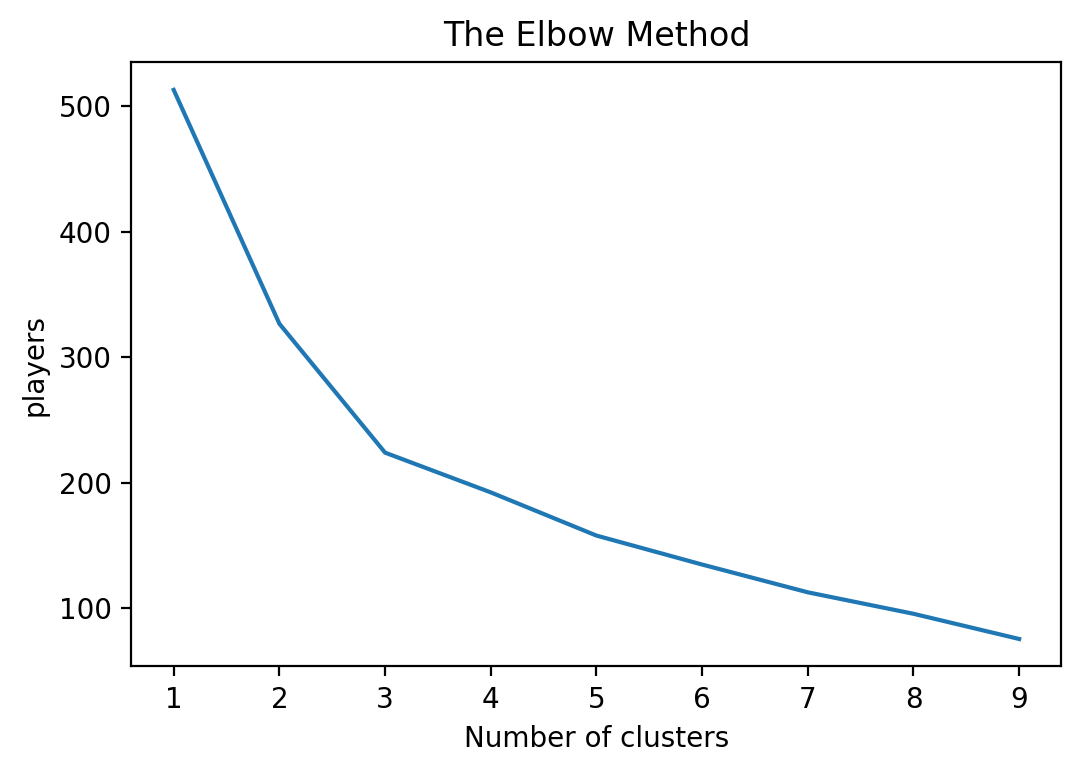

In [25]:
from sklearn.cluster import KMeans
players = []
for i in range(1,10):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    players.append(kmeans.inertia_)
plt.plot(range(1, 10), players)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('players')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)


In [27]:
y_kmeans

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 1, 2, 2, 1, 1, 1, 0, 0, 2, 2])

In [28]:
kmeans.cluster_centers_

array([[-1.218536  , -1.00719968, -0.84607156, -0.67634319, -0.45715365,
        -0.34108057, -0.65091415, -0.53950549, -0.58950634, -0.56193549,
        -0.44340422, -0.60359438, -0.61132083, -0.13588585, -1.218536  ,
        -0.665444  , -0.64840785, -0.32215676, -0.62580226, -0.60154738,
        -0.14078273, -0.25004616, -0.16653879, -0.165985  , -0.34299717,
        -0.80500636, -0.16758469],
       [ 0.91339428,  1.25518444,  0.130884  ,  1.44833865,  1.32012954,
         1.17756248,  1.41126806,  0.64177886,  1.27726375,  1.34167544,
        -0.00940554,  1.36796098,  1.21795018,  0.0031783 ,  0.91339428,
        -0.39595114, -0.56576349, -0.35673856, -0.57122243, -0.56953226,
        -0.45680866, -0.51945897, -0.44826208, -0.51639778, -0.34299717,
         1.01840143,  0.46923713],
       [ 0.50823106, -0.08011816,  0.85619949, -0.65927159, -0.78678362,
        -0.77963516, -0.65186822, -0.01235579, -0.58950634, -0.68608403,
         0.52671047, -0.66376753, -0.50474254,  0.1553

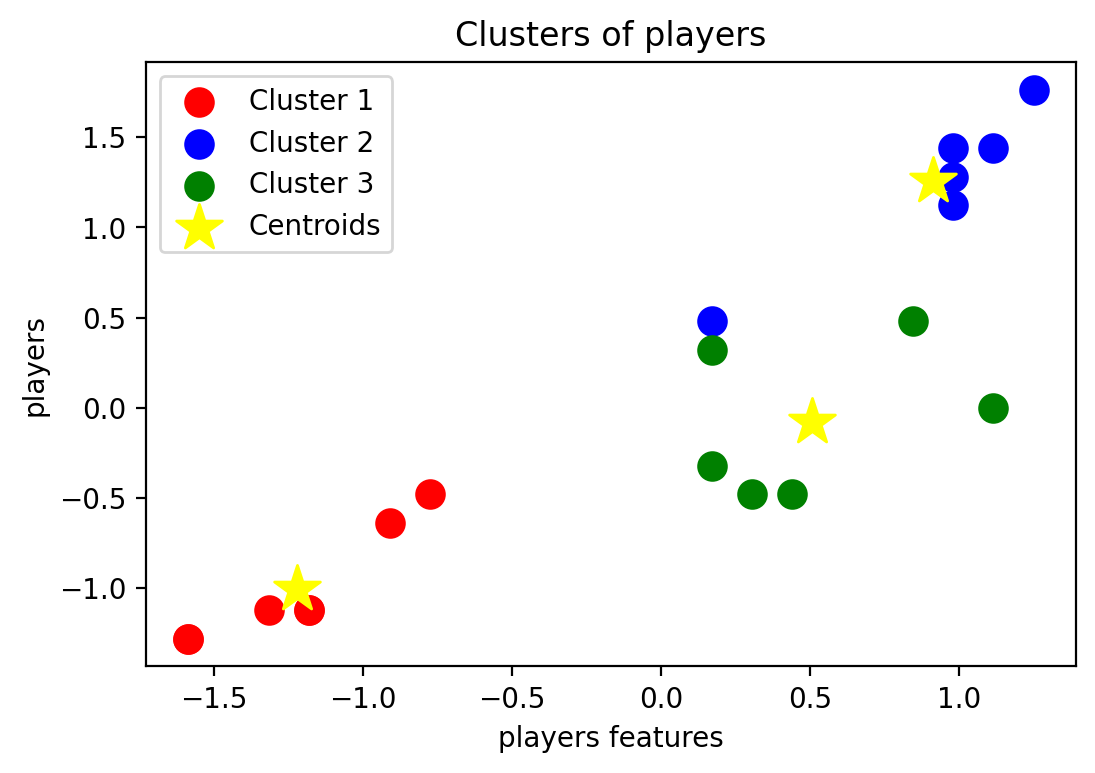

In [29]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300,marker='*', c = 'yellow', label = 'Centroids')
plt.title('Clusters of players')
plt.xlabel('players features')
plt.ylabel('players')
plt.legend()
plt.show()

In [30]:
England_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Runs_y,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),14,11,3,145,46*,18.12,148,97.97,0,...,588,6,3/50,98.00,6.39,92.0,0,0,6,0
1,JC Archer (ENG),14,7,3,13,7*,3.25,22,59.09,0,...,569,23,3/27,24.73,4.63,32.0,0,0,4,0
2,JM Bairstow (ENG),20,18,0,844,128,46.88,820,102.92,3,...,-,-,-,-,-,-,-,-,11,0
3,JC Buttler (ENG),20,16,2,667,150,47.64,492,135.56,3,...,-,-,-,-,-,-,-,-,18,6
4,TK Curran (ENG),6,5,2,107,47*,35.66,104,102.88,0,...,290,9,4/75,32.22,6.54,29.5,1,0,0,0
5,JL Denly (ENG),4,2,0,25,17,12.50,38,65.78,0,...,60,1,1/24,60.00,5.45,66.0,0,0,2,0
6,BT Foakes (ENG),1,1,1,61,61*,-,76,80.26,0,...,-,-,-,-,-,-,-,-,2,1
7,AD Hales (ENG),3,2,0,105,82,52.50,108,97.22,0,...,-,-,-,-,-,-,-,-,2,0
8,DJ Malan (ENG),1,1,0,24,24,24.00,30,80.00,0,...,-,-,-,-,-,-,-,-,0,0
9,EJG Morgan (ENG),21,18,3,791,148,52.73,705,112.19,2,...,-,-,-,-,-,-,-,-,7,0


In [31]:
England_2019["cluster"] = y_kmeans

In [32]:
England_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MM Ali (ENG),14,11,3,145,46*,18.12,148,97.97,0,...,6,3/50,98.00,6.39,92.0,0,0,6,0,2
1,JC Archer (ENG),14,7,3,13,7*,3.25,22,59.09,0,...,23,3/27,24.73,4.63,32.0,0,0,4,0,2
2,JM Bairstow (ENG),20,18,0,844,128,46.88,820,102.92,3,...,-,-,-,-,-,-,-,11,0,1
3,JC Buttler (ENG),20,16,2,667,150,47.64,492,135.56,3,...,-,-,-,-,-,-,-,18,6,1
4,TK Curran (ENG),6,5,2,107,47*,35.66,104,102.88,0,...,9,4/75,32.22,6.54,29.5,1,0,0,0,0
5,JL Denly (ENG),4,2,0,25,17,12.50,38,65.78,0,...,1,1/24,60.00,5.45,66.0,0,0,2,0,0
6,BT Foakes (ENG),1,1,1,61,61*,-,76,80.26,0,...,-,-,-,-,-,-,-,2,1,0
7,AD Hales (ENG),3,2,0,105,82,52.50,108,97.22,0,...,-,-,-,-,-,-,-,2,0,0
8,DJ Malan (ENG),1,1,0,24,24,24.00,30,80.00,0,...,-,-,-,-,-,-,-,0,0,0
9,EJG Morgan (ENG),21,18,3,791,148,52.73,705,112.19,2,...,-,-,-,-,-,-,-,7,0,1


In [33]:
England_2019['cluster'].value_counts()

0    7
1    6
2    6
Name: cluster, dtype: int64

In [34]:
England_Cluster_2019 = np.array([7,6,6])

In [35]:
England_Cluster_2019

array([7, 6, 6])

In [36]:
%store England_Cluster_2019

Stored 'England_Cluster_2019' (ndarray)


In [37]:
England_2019_players_scaled.insert(0, 'Player', England_2019.Player)

In [38]:
England_2019_players_scaled

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Mdns,Runs_y,Wkts,Ave_y,Econ,SR_y,4,5,Ct,St
0,MM Ali (ENG),0.170595,0.320473,0.752583,-0.456851,-0.375596,-0.598911,-0.438671,0.127074,-0.589506,...,-0.477775,0.922837,-0.217366,2.770026,1.054427,2.558221,-0.516398,-0.342997,0.108938,-0.273722
1,JC Archer (ENG),0.170595,-0.320473,0.752583,-0.843157,-1.170786,-1.321322,-0.827050,-1.680942,-0.589506,...,3.153314,0.864686,1.415406,-0.006062,0.444286,0.250965,-0.516398,-0.342997,-0.267392,-0.273722
2,JM Bairstow (ENG),0.980921,1.442127,-1.112514,1.588813,1.296342,0.798301,1.632685,0.357261,1.810627,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,1.049762,-0.273722
3,JC Buttler (ENG),0.980921,1.121654,0.130884,1.070813,1.744910,0.835223,0.621666,1.875102,1.810627,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,2.366917,4.184031
4,TK Curran (ENG),-0.909840,-0.640945,0.130884,-0.568061,-0.355206,0.253213,-0.574295,0.355401,-0.589506,...,-0.114666,0.010792,0.070770,0.277722,1.106428,0.154829,1.936492,-0.342997,-1.020052,-0.273722
5,JL Denly (ENG),-1.179949,-1.121654,-1.112514,-0.808038,-0.966891,-0.871941,-0.777732,-1.369840,-0.589506,...,-0.477775,-0.693134,-0.697593,1.330264,0.728556,1.558410,-0.516398,-0.342997,-0.643722,-0.273722
6,BT Foakes (ENG),-1.585112,-1.281890,-0.490815,-0.702682,-0.069753,-1.479213,-0.660602,-0.696485,-0.589506,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,-0.643722,0.469237
7,AD Hales (ENG),-1.315003,-1.121654,-1.112514,-0.573914,0.358426,1.071330,-0.561966,0.092197,-0.589506,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,-0.643722,-0.273722
8,DJ Malan (ENG),-1.585112,-1.281890,-1.112514,-0.810965,-0.824164,-0.313250,-0.802391,-0.708575,-0.589506,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,-1.020052,-0.273722
9,EJG Morgan (ENG),1.115976,1.442127,0.752583,1.433706,1.704131,1.082504,1.278212,0.788339,1.010582,...,-0.477775,-0.876767,-0.793638,-0.943044,-1.160800,-0.979572,-0.516398,-0.342997,0.297103,-0.273722


In [39]:
England_2019_players_scaled[['Player','Ave_x','Ave_y']]

,Player,Ave_x,Ave_y
0,MM Ali (ENG),-0.598911,2.770026
1,JC Archer (ENG),-1.321322,-0.006062
2,JM Bairstow (ENG),0.798301,-0.943044
3,JC Buttler (ENG),0.835223,-0.943044
4,TK Curran (ENG),0.253213,0.277722
5,JL Denly (ENG),-0.871941,1.330264
6,BT Foakes (ENG),-1.479213,-0.943044
7,AD Hales (ENG),1.071330,-0.943044
8,DJ Malan (ENG),-0.313250,-0.943044
9,EJG Morgan (ENG),1.082504,-0.943044


In [40]:
England_2019_Ave =England_2019_players_scaled.mean()

In [41]:
England_2019_Ave

Mat_x           5.258951e-17
Inns_x          0.000000e+00
NO              1.168656e-17
Runs_x         -5.258951e-17
HS              3.505967e-17
Ave_x          -4.674623e-17
BF             -1.168656e-17
SR_x           -2.687908e-16
100             0.000000e+00
50             -3.505967e-17
0               5.843279e-17
4s             -3.505967e-17
6s             -5.843279e-18
Unnamed: 0_y    1.519253e-16
Mat_y           5.258951e-17
Inns_y          5.843279e-17
Overs          -5.843279e-17
Mdns           -3.213803e-17
Runs_y          5.843279e-17
Wkts           -2.337312e-17
Ave_y          -4.674623e-17
Econ           -9.349247e-17
SR_y            5.989361e-17
4               9.349247e-17
5               0.000000e+00
Ct             -1.227089e-16
St              1.110223e-16
dtype: float64

In [42]:
England_Ave_2019 =England_2019_Ave[['Ave_x','Ave_y']]

In [43]:
England_Ave_2019

Ave_x   -4.674623e-17
Ave_y   -4.674623e-17
dtype: float64

In [44]:
England_Ave_2019 = np.array([England_Ave_2019.Ave_x, England_Ave_2019.Ave_y])

In [45]:
England_Ave_2019

array([-4.67462326e-17, -4.67462326e-17])

In [46]:
%store England_Ave_2019

Stored 'England_Ave_2019' (ndarray)


In [47]:
England_2019

,Player,Mat_x,Inns_x,NO,Runs_x,HS,Ave_x,BF,SR_x,100,...,Wkts,BBI,Ave_y,Econ,SR_y,4,5,Ct,St,cluster
0,MM Ali (ENG),14,11,3,145,46*,18.12,148,97.97,0,...,6,3/50,98.00,6.39,92.0,0,0,6,0,2
1,JC Archer (ENG),14,7,3,13,7*,3.25,22,59.09,0,...,23,3/27,24.73,4.63,32.0,0,0,4,0,2
2,JM Bairstow (ENG),20,18,0,844,128,46.88,820,102.92,3,...,-,-,-,-,-,-,-,11,0,1
3,JC Buttler (ENG),20,16,2,667,150,47.64,492,135.56,3,...,-,-,-,-,-,-,-,18,6,1
4,TK Curran (ENG),6,5,2,107,47*,35.66,104,102.88,0,...,9,4/75,32.22,6.54,29.5,1,0,0,0,0
5,JL Denly (ENG),4,2,0,25,17,12.50,38,65.78,0,...,1,1/24,60.00,5.45,66.0,0,0,2,0,0
6,BT Foakes (ENG),1,1,1,61,61*,-,76,80.26,0,...,-,-,-,-,-,-,-,2,1,0
7,AD Hales (ENG),3,2,0,105,82,52.50,108,97.22,0,...,-,-,-,-,-,-,-,2,0,0
8,DJ Malan (ENG),1,1,0,24,24,24.00,30,80.00,0,...,-,-,-,-,-,-,-,0,0,0
9,EJG Morgan (ENG),21,18,3,791,148,52.73,705,112.19,2,...,-,-,-,-,-,-,-,7,0,1
